# Statistical analysis

In [1]:
import numpy as np
import pandas as pd

## Check for missing values and drop column missing more than 30% of data

* Both dataframe has the same set of features

In [2]:
positive_data_path = 'C:/Users/Rui/Desktop/Data/processed_positive_patients_data.csv'  # Load positive csv data
negative_data_path = 'C:/Users/Rui/Desktop/Data/processed_negative_patients_data.csv'  # Load negative csv data

df_positive = pd.read_csv(positive_data_path)  # Get dataframe containing all positive patients
df_negative = pd.read_csv(negative_data_path)  # Get dataframe containing all negative patients

threshold = 0.2  # Missing more than 30% is the threshold

df_positive_filtered = df_positive.loc[:, df_positive.isnull().mean() <= threshold]  # Leave only columns with less than 30% missing value
df_negative_filtered = df_negative.loc[:, df_negative.isnull().mean() <= threshold]

dropped_from_positive = set(df_positive.columns) - set(df_positive_filtered.columns)  # Check for dropped column in both sets
dropped_from_negative = set(df_negative.columns) - set(df_negative_filtered.columns)

print("Features dropped from positive patients (>20%):", dropped_from_positive)
print("Features dropped from negative patients (>20%):", dropped_from_negative)

positive_features = set(df_positive_filtered.columns)
negative_features = set(df_negative_filtered.columns)

common_features = positive_features.intersection(negative_features)  # Check for common features
missing_in_positive = negative_features - positive_features
missing_in_negative = positive_features - negative_features


print(f"\nDo the two DataFrames have the same columns after dropping: {'Yes' if positive_features == negative_features else 'No'}")
print("Common columns:", common_features)
print("Columns only in the negative DataFrame:", missing_in_positive)
print("Columns only in the positive DataFrame:", missing_in_negative)


Features dropped from positive patients (>20%): {'pressure_dias_median', 'body_temperature_median', 'pH_min', 'BMI', 'serum_lactate_median', 'pressure_sys_median', 'bilirubin_total_max', 'pressure_sys_max', 'pH_max', 'pressure_sys_min', 'body_temperature_min', 'height', 'albumin_max', 'pressure_mean_min', 'pressure_sys_mean', 'serum_lactate_mean', 'body_temperature_mean', 'pressure_mean_mean', 'pressure_dias_mean', 'bilirubin_total_min', 'albumin_median', 'pressure_dias_max', 'hematocrit_min', 'albumin_min', 'pH_median', 'pressure_dias_min', 'pH_mean', 'hematocrit_max', 'bilirubin_total_mean', 'serum_lactate_max', 'body_temperature_max', 'pressure_mean_max', 'pressure_mean_median', 'hematocrit_median', 'serum_lactate_min', 'albumin_mean', 'hematocrit_mean', 'bilirubin_total_median'}
Features dropped from negative patients (>20%): {'pressure_dias_median', 'body_temperature_median', 'pH_min', 'BMI', 'serum_lactate_median', 'pressure_sys_median', 'bilirubin_total_max', 'pressure_sys_max',

## Imputation for columns missing data

* Mean Imputation

    Advantages: Simple and quick to implement; useful when data is normally distributed.
    
    Best Fit: Works well when missing values are minimal and data distribution is not highly skewed.

-----------------------------------------

* Median Imputation

    Advantages: Resistant to outliers, providing a more robust imputation than the mean.

    Best Fit: Ideal for skewed data or when there are significant outliers.

-----------------------------------------

* K-Nearest Neighbors (KNN) Imputation

    Advantages: Uses information from similar data points, often leading to more accurate imputations.

    Best Fit: Suitable for datasets with complex relationships and multiple variables; can handle both categorical and continuous data.

-----------------------------------------

* Multivariate Imputation by Chained Equations (MICE)

    Advantages: Iteratively models each variable with missing values, incorporating relationships with other variables.

    Best Fit: Best for datasets with a high percentage of missing values and complex variable relationships.

-----------------------------------------

** For the given case, KNN or MICE seem to be a good fit for the job  **

In [3]:
df_positive_filtered

,stay_id,gender,age,race,weight,heart_rate_max,heart_rate_min,heart_rate_mean,heart_rate_median,SpO2_max,...,CPD,diabetes,liver_disease,PUD,PVD,MI,CD,hiv,CDK,cancer
0,38875437,F,81,WHITE,43.0,120.0,93.0,105.207317,105.0,100.0,...,0,0,0,0,0,0,0,0,0,0
1,39635619,M,51,UNKNOWN,112.5,107.0,82.0,95.352941,94.5,100.0,...,0,0,0,0,0,0,0,0,0,0
2,37005236,F,72,WHITE,63.1,111.0,79.0,87.833333,85.5,99.0,...,0,0,0,0,0,0,0,0,0,0
3,32769810,F,70,BLACK/AFRICAN,69.9,114.0,101.0,106.750000,106.0,100.0,...,0,0,0,0,0,0,0,0,0,0
4,34107647,F,70,WHITE,96.0,124.0,96.0,106.428571,106.5,97.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2146,32959861,F,78,UNKNOWN,57.0,109.0,85.0,95.785714,94.0,99.0,...,0,0,0,0,0,0,0,0,0,0
2147,31629173,M,76,WHITE,134.5,90.0,72.0,79.500000,79.0,100.0,...,0,0,0,0,0,0,0,0,0,0
2148,32568753,F,82,WHITE,63.1,102.0,85.0,95.846154,98.0,100.0,...,0,0,0,0,0,0,0,0,0,0
2149,32641669,F,72,BLACK/AFRICAN AMERICAN,77.1,81.0,59.0,70.440000,71.0,100.0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df_negative_filtered

,stay_id,gender,age,race,weight,heart_rate_max,heart_rate_min,heart_rate_mean,heart_rate_median,SpO2_max,...,CPD,diabetes,liver_disease,PUD,PVD,MI,CD,hiv,CDK,cancer
0,37510196,F,77,BLACK/AFRICAN AMERICAN,65.0,80.0,38.0,71.392857,71.5,100.0,...,0,0,0,0,0,0,0,0,0,0
1,31090461,F,82,WHITE,48.0,107.0,68.0,84.920000,87.0,98.0,...,0,0,0,0,0,0,0,0,0,0
2,32610785,F,77,WHITE,41.6,84.0,53.0,64.880000,64.0,97.0,...,0,0,0,0,0,0,0,0,0,1
3,35479615,F,81,WHITE,48.4,109.0,67.0,89.259259,92.0,100.0,...,0,0,0,0,0,0,0,0,0,0
4,35044219,M,53,WHITE,156.1,150.0,73.0,93.928571,86.5,98.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4837,32880062,M,47,UNKNOWN,70.0,86.0,72.0,79.625000,80.5,100.0,...,0,0,0,0,0,0,0,0,0,0
4838,37403074,M,72,WHITE,62.2,99.0,81.0,91.708333,90.5,100.0,...,0,0,0,0,0,0,0,0,0,0
4839,31417783,F,72,BLACK/AFRICAN AMERICAN,77.6,79.0,66.0,71.400000,70.0,100.0,...,0,0,0,0,0,0,0,0,0,0
4840,30988867,M,45,UNKNOWN,90.0,120.0,43.0,86.272727,92.5,100.0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Check for missing values in each column
missing_values = df_positive_filtered.isnull().sum()

# Display columns with missing values
missing_columns = missing_values[missing_values > 0]
print(missing_columns)
missing_values?

weight                      123
heart_rate_max               12
heart_rate_min               12
heart_rate_mean              12
heart_rate_median            12
                           ... 
RBC_median                   13
serum_bicarbonate_max         2
serum_bicarbonate_min         2
serum_bicarbonate_mean        2
serum_bicarbonate_median      2
Length: 69, dtype: int64


Type:        Series
String form:
stay_id      0
gender       0
age          0
race         0
weight     123
          ... 
MI           0
CD           0
hiv          0
CDK          0
cancer       0
Length: 85, dtype: int64
Length:      85
File:        c:\users\rui\appdata\local\programs\python\python310\lib\site-packages\pandas\core\series.py
Docstring:  
One-dimensional ndarray with axis labels (including time series).

Labels need not be unique but must be a hashable type. The object
supports both integer- and label-based indexing and provides a host of
methods for performing operations involving the index. Statistical
methods from ndarray have been overridden to automatically exclude
missing data (currently represented as NaN).

Operations between Series (+, -, /, \*, \*\*) align values based on their
associated index values-- they need not be the same length. The result
index will be the sorted union of the two indexes.

Parameters
----------
data : array-like, Iterable, dict, or s

In [6]:
# Check for missing values in each column
missing_values = df_negative_filtered.isnull().sum()

# Display columns with missing values
missing_columns = missing_values[missing_values > 0]
print(missing_columns)
missing_values?

weight                      290
heart_rate_max                9
heart_rate_min                9
heart_rate_mean               9
heart_rate_median             9
                           ... 
RBC_median                   18
serum_bicarbonate_max         5
serum_bicarbonate_min         5
serum_bicarbonate_mean        5
serum_bicarbonate_median      5
Length: 69, dtype: int64


Type:        Series
String form:
stay_id      0
gender       0
age          0
race         0
weight     290
          ... 
MI           0
CD           0
hiv          0
CDK          0
cancer       0
Length: 85, dtype: int64
Length:      85
File:        c:\users\rui\appdata\local\programs\python\python310\lib\site-packages\pandas\core\series.py
Docstring:  
One-dimensional ndarray with axis labels (including time series).

Labels need not be unique but must be a hashable type. The object
supports both integer- and label-based indexing and provides a host of
methods for performing operations involving the index. Statistical
methods from ndarray have been overridden to automatically exclude
missing data (currently represented as NaN).

Operations between Series (+, -, /, \*, \*\*) align values based on their
associated index values-- they need not be the same length. The result
index will be the sorted union of the two indexes.

Parameters
----------
data : array-like, Iterable, dict, or s

In [7]:
from sklearn.experimental import enable_iterative_imputer  # Required for MICE
from sklearn.impute import IterativeImputer

# Define the imputer
mice_imputer = IterativeImputer(max_iter=20, random_state=0)

# Separate numerical and non-numerical columns for df_positive_filtered
num_cols_pos = df_positive_filtered.select_dtypes(include=['float64']).columns
non_num_cols_pos = df_positive_filtered.select_dtypes(exclude=['float64']).columns

# Impute only the numerical columns
imputed_positive_data = pd.DataFrame(mice_imputer.fit_transform(df_positive_filtered[num_cols_pos]), columns=num_cols_pos)

# Concatenate imputed numerical data with non-numerical columns
MICE_imputed_positive_data = pd.concat([imputed_positive_data, df_positive_filtered[non_num_cols_pos].reset_index(drop=True)], axis=1)
del imputed_positive_data

# Repeat for df_negative_filtered
num_cols_neg = df_negative_filtered.select_dtypes(include=['float64']).columns
non_num_cols_neg = df_negative_filtered.select_dtypes(exclude=['float64']).columns

imputed_negative_data = pd.DataFrame(mice_imputer.fit_transform(df_negative_filtered[num_cols_neg]), columns=num_cols_neg)
MICE_imputed_negative_data = pd.concat([imputed_negative_data, df_negative_filtered[non_num_cols_neg].reset_index(drop=True)], axis=1)
del imputed_negative_data

In [8]:
MICE_imputed_positive_data#['stay_id']

,weight,heart_rate_max,heart_rate_min,heart_rate_mean,heart_rate_median,SpO2_max,SpO2_min,SpO2_mean,SpO2_median,respiration_rate_max,...,CPD,diabetes,liver_disease,PUD,PVD,MI,CD,hiv,CDK,cancer
0,43.0,120.0,93.0,105.207317,105.0,100.0,91.0,99.196721,100.0,28.0,...,0,0,0,0,0,0,0,0,0,0
1,112.5,107.0,82.0,95.352941,94.5,100.0,90.0,95.735294,95.0,31.0,...,0,0,0,0,0,0,0,0,0,0
2,63.1,111.0,79.0,87.833333,85.5,99.0,89.0,95.791667,96.5,34.0,...,0,0,0,0,0,0,0,0,0,0
3,69.9,114.0,101.0,106.750000,106.0,100.0,92.0,96.541667,97.0,35.0,...,0,0,0,0,0,0,0,0,0,0
4,96.0,124.0,96.0,106.428571,106.5,97.0,92.0,94.607143,94.0,35.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2146,57.0,109.0,85.0,95.785714,94.0,99.0,92.0,96.285714,96.0,29.0,...,0,0,0,0,0,0,0,0,0,0
2147,134.5,90.0,72.0,79.500000,79.0,100.0,91.0,96.307692,97.0,26.0,...,0,0,0,0,0,0,0,0,0,0
2148,63.1,102.0,85.0,95.846154,98.0,100.0,94.0,98.074074,98.0,29.0,...,0,0,0,0,0,0,0,0,0,0
2149,77.1,81.0,59.0,70.440000,71.0,100.0,92.0,95.080000,95.0,24.0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# Check for missing values in each column
missing_values = MICE_imputed_positive_data.isnull().sum()

# Display columns with missing values
missing_columns = missing_values[missing_values > 0]
print(missing_columns)
missing_values?

Series([], dtype: int64)


Type:        Series
String form:
weight               0
           heart_rate_max       0
           heart_rate_min       0
           heart_rate_mean      0
           heart <...>   0
           hiv                  0
           CDK                  0
           cancer               0
           Length: 85, dtype: int64
Length:      85
File:        c:\users\rui\appdata\local\programs\python\python310\lib\site-packages\pandas\core\series.py
Docstring:  
One-dimensional ndarray with axis labels (including time series).

Labels need not be unique but must be a hashable type. The object
supports both integer- and label-based indexing and provides a host of
methods for performing operations involving the index. Statistical
methods from ndarray have been overridden to automatically exclude
missing data (currently represented as NaN).

Operations between Series (+, -, /, \*, \*\*) align values based on their
associated index values-- they need not be the same length. The result
index will be

In [10]:
MICE_imputed_negative_data#['stay_id']

,weight,heart_rate_max,heart_rate_min,heart_rate_mean,heart_rate_median,SpO2_max,SpO2_min,SpO2_mean,SpO2_median,respiration_rate_max,...,CPD,diabetes,liver_disease,PUD,PVD,MI,CD,hiv,CDK,cancer
0,65.0,80.0,38.0,71.392857,71.5,100.0,89.0,98.192308,100.0,26.0,...,0,0,0,0,0,0,0,0,0,0
1,48.0,107.0,68.0,84.920000,87.0,98.0,91.0,93.840000,94.0,22.0,...,0,0,0,0,0,0,0,0,0,0
2,41.6,84.0,53.0,64.880000,64.0,97.0,90.0,93.760000,94.0,25.0,...,0,0,0,0,0,0,0,0,0,1
3,48.4,109.0,67.0,89.259259,92.0,100.0,96.0,98.962963,99.0,25.0,...,0,0,0,0,0,0,0,0,0,0
4,156.1,150.0,73.0,93.928571,86.5,98.0,90.0,93.285714,93.0,30.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4837,70.0,86.0,72.0,79.625000,80.5,100.0,98.0,98.625000,99.0,35.0,...,0,0,0,0,0,0,0,0,0,0
4838,62.2,99.0,81.0,91.708333,90.5,100.0,93.0,96.375000,96.0,27.0,...,0,0,0,0,0,0,0,0,0,0
4839,77.6,79.0,66.0,71.400000,70.0,100.0,90.0,94.000000,93.0,26.0,...,0,0,0,0,0,0,0,0,0,0
4840,90.0,120.0,43.0,86.272727,92.5,100.0,100.0,100.000000,100.0,30.0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# Check for missing values in each column
missing_values = MICE_imputed_negative_data.isnull().sum()

# Display columns with missing values
missing_columns = missing_values[missing_values > 0]
print(missing_columns)
missing_values?

Series([], dtype: int64)


Type:        Series
String form:
weight               0
           heart_rate_max       0
           heart_rate_min       0
           heart_rate_mean      0
           heart <...>   0
           hiv                  0
           CDK                  0
           cancer               0
           Length: 85, dtype: int64
Length:      85
File:        c:\users\rui\appdata\local\programs\python\python310\lib\site-packages\pandas\core\series.py
Docstring:  
One-dimensional ndarray with axis labels (including time series).

Labels need not be unique but must be a hashable type. The object
supports both integer- and label-based indexing and provides a host of
methods for performing operations involving the index. Statistical
methods from ndarray have been overridden to automatically exclude
missing data (currently represented as NaN).

Operations between Series (+, -, /, \*, \*\*) align values based on their
associated index values-- they need not be the same length. The result
index will be

In [12]:
MICE_imputed_negative_data.columns

Index(['weight', 'heart_rate_max', 'heart_rate_min', 'heart_rate_mean',
       'heart_rate_median', 'SpO2_max', 'SpO2_min', 'SpO2_mean', 'SpO2_median',
       'respiration_rate_max', 'respiration_rate_min', 'respiration_rate_mean',
       'respiration_rate_median', 'anion_gap_max', 'anion_gap_min',
       'anion_gap_mean', 'anion_gap_median', 'serum_chloride_max',
       'serum_chloride_min', 'serum_chloride_mean', 'serum_chloride_median',
       'serum_potassium_max', 'serum_potassium_min', 'serum_potassium_mean',
       'serum_potassium_median', 'serum_sodium_max', 'serum_sodium_min',
       'serum_sodium_mean', 'serum_sodium_median', 'serum_magnesium_max',
       'serum_magnesium_min', 'serum_magnesium_mean', 'serum_magnesium_median',
       'PTT_max', 'PTT_min', 'PTT_mean', 'PTT_median', 'PT_max', 'PT_min',
       'PT_mean', 'PT_median', 'BUN_max', 'BUN_min', 'BUN_mean', 'BUN_median',
       'serum_creatinine_max', 'serum_creatinine_min', 'serum_creatinine_mean',
       'serum_crea

## Statistical analysis

In [13]:
from scipy.stats import shapiro, mannwhitneyu, ttest_ind, chi2_contingency

# Continuous and categorical feature sets
continuous_feature_set = [
    'weight', 'heart_rate_max', 'heart_rate_min', 'heart_rate_mean',
    'heart_rate_median', 'SpO2_max', 'SpO2_min', 'SpO2_mean', 'SpO2_median',
    'respiration_rate_max', 'respiration_rate_min', 'respiration_rate_mean',
    'respiration_rate_median', 'anion_gap_max', 'anion_gap_min',
    'anion_gap_mean', 'anion_gap_median', 'serum_chloride_max',
    'serum_chloride_min', 'serum_chloride_mean', 'serum_chloride_median',
    'serum_potassium_max', 'serum_potassium_min', 'serum_potassium_mean',
    'serum_potassium_median', 'serum_sodium_max', 'serum_sodium_min',
    'serum_sodium_mean', 'serum_sodium_median', 'serum_magnesium_max',
    'serum_magnesium_min', 'serum_magnesium_mean', 'serum_magnesium_median',
    'PTT_max', 'PTT_min', 'PTT_mean', 'PTT_median', 'PT_max', 'PT_min',
    'PT_mean', 'PT_median', 'BUN_max', 'BUN_min', 'BUN_mean', 'BUN_median',
    'serum_creatinine_max', 'serum_creatinine_min', 'serum_creatinine_mean',
    'serum_creatinine_median', 'hemoglobin_max', 'hemoglobin_min',
    'hemoglobin_mean', 'hemoglobin_median', 'platelets_max',
    'platelets_min', 'platelets_mean', 'platelets_median', 'WBC_max',
    'WBC_min', 'WBC_mean', 'WBC_median', 'RBC_max', 'RBC_min', 'RBC_mean',
    'RBC_median', 'serum_bicarbonate_max', 'serum_bicarbonate_min',
    'serum_bicarbonate_mean', 'serum_bicarbonate_median', 'age'
]

categorical_feature_set = [
    'CHF', 'hypertension', 'CPD', 'diabetes', 'liver_disease', 'PUD', 'PVD',
    'MI', 'CD', 'hiv', 'CDK', 'cancer', 'gender', 'race'
]


continuous_results = []   # Lists to store summary results
categorical_results = []

def flatten_proportion(proportion_dict):  # Flatten dictionary columns for categorical proportions for CSV output
    return '; '.join([f"{k}: {v:.2%}" for k, v in proportion_dict.items()])

for feature in continuous_feature_set:  # Iterate through each feature in the dataset
    pos_data = MICE_imputed_positive_data[feature]  # Get data from the positive dataframe
    neg_data = MICE_imputed_negative_data[feature]  # Get data from the negative dataframe

    pos_median = pos_data.median()  # Get the median for positive patient of that feature
    pos_iqr = f"{pos_median:.1f} [{pos_data.quantile(0.25):.1f} - {pos_data.quantile(0.75):.1f}]"  # Get the interquatile range for that patient
    neg_median = neg_data.median()  # Get the median for negative patient of that feature
    neg_iqr = f"{neg_median:.1f} [{neg_data.quantile(0.25):.1f} - {neg_data.quantile(0.75):.1f}]"  # Interquatile range for that patient again

    summary = {
        'Feature': feature,
        'Positive_Median_IQR': pos_iqr,
        'Negative_Median_IQR': neg_iqr
    }  # Store this as a summary

    
    pos_normality_p = shapiro(pos_data)[1] if len(pos_data) >= 3 else np.nan  # Normality test Perform normality test
    neg_normality_p = shapiro(neg_data)[1] if len(neg_data) >= 3 else np.nan

    summary['Positive_Normality_p'] = pos_normality_p  # Store the normality test score
    summary['Negative_Normality_p'] = neg_normality_p

    
    pos_normal = pos_normality_p > 0.05  # Choose appropriate test based on normality Check threshold
    neg_normal = neg_normality_p > 0.05

    if pos_normal and neg_normal:
        
        _, p_value = ttest_ind(pos_data, neg_data, equal_var=False)  # Use independent T-test if both are normal
        summary['Test_Type'] = 'T-test'
    else:
        
        _, p_value = mannwhitneyu(pos_data, neg_data, alternative='two-sided') # Else use Mann-Whitney U test to check two features
        summary['Test_Type'] = 'Mann-Whitney U'

    summary['P_Value'] = p_value

    continuous_results.append(summary)

# Do the same thing for categorical variables
for feature in categorical_feature_set:
    pos_data = MICE_imputed_positive_data[feature]
    neg_data = MICE_imputed_negative_data[feature]

    pos_counts = pos_data.value_counts(normalize=True, dropna=False)  # Calculate proportions
    neg_counts = neg_data.value_counts(normalize=True, dropna=False)

    summary = {
        'Feature': feature,
        'Positive_Proportion': pos_counts.to_dict(),
        'Negative_Proportion': neg_counts.to_dict(),
        'Test_Type': 'Chi-Square'
    }

    contingency_table = pd.crosstab(MICE_imputed_positive_data[feature], MICE_imputed_negative_data[feature], dropna=False)  # Create contingency table and perform Chi-square test

    if contingency_table.shape == (1, 1):
        p_value = np.nan
    else:
        _, p_value, _, _ = chi2_contingency(contingency_table)

    summary['P_Value'] = p_value

    categorical_results.append(summary)


continuous_df = pd.DataFrame(continuous_results)  # Convert to DataFrames
categorical_df = pd.DataFrame(categorical_results)

categorical_df['Positive_Proportion'] = categorical_df['Positive_Proportion'].apply(
    lambda x: flatten_proportion(x) if isinstance(x, dict) else x)
categorical_df['Negative_Proportion'] = categorical_df['Negative_Proportion'].apply(
    lambda x: flatten_proportion(x) if isinstance(x, dict) else x)


continuous_df.to_csv('continuous_feature_analysis.csv', index=False)  # Save to separate CSV files
categorical_df.to_csv('categorical_feature_analysis.csv', index=False)


In [14]:
continuous_df

,Feature,Positive_Median_IQR,Negative_Median_IQR,Positive_Normality_p,Negative_Normality_p,Test_Type,P_Value
0,weight,76.7 [65.0 - 90.0],73.6 [63.0 - 84.8],1.244520e-24,1.265338e-59,Mann-Whitney U,1.815038e-11
1,heart_rate_max,108.0 [92.0 - 123.0],106.0 [92.0 - 120.0],6.819903e-54,2.181513e-28,Mann-Whitney U,1.228957e-02
2,heart_rate_min,74.0 [63.0 - 86.0],70.0 [61.0 - 82.0],5.223346e-08,3.806782e-18,Mann-Whitney U,3.166653e-14
3,heart_rate_mean,88.8 [77.4 - 101.0],85.8 [76.1 - 97.8],1.865538e-08,3.826743e-17,Mann-Whitney U,3.140562e-07
4,heart_rate_median,88.0 [76.0 - 100.5],85.0 [75.0 - 97.0],8.264984e-10,5.375172e-16,Mann-Whitney U,1.580335e-06
...,...,...,...,...,...,...,...
65,serum_bicarbonate_max,23.0 [20.0 - 26.0],24.0 [22.0 - 27.0],7.331436e-19,1.307991e-36,Mann-Whitney U,6.442042e-33
66,serum_bicarbonate_min,21.0 [18.0 - 24.0],23.0 [20.0 - 25.0],1.796702e-11,3.510052e-31,Mann-Whitney U,5.751446e-53
67,serum_bicarbonate_mean,22.0 [19.0 - 25.0],23.5 [21.0 - 26.0],7.574936e-15,3.159909e-34,Mann-Whitney U,1.813648e-46
68,serum_bicarbonate_median,22.0 [19.0 - 25.0],23.5 [21.0 - 26.0],3.832239e-15,1.705720e-34,Mann-Whitney U,7.136968e-46


In [15]:
continuous_insignificant_features = set(continuous_df[continuous_df['P_Value'] > 0.0001]['Feature'])
continuous_insignificant_features  # Insignificant continuous features

{'WBC_max',
 'WBC_mean',
 'WBC_median',
 'WBC_min',
 'heart_rate_max',
 'platelets_max',
 'platelets_mean',
 'platelets_median',
 'platelets_min',
 'serum_chloride_max',
 'serum_chloride_mean',
 'serum_chloride_median',
 'serum_chloride_min',
 'serum_potassium_min',
 'serum_sodium_max',
 'serum_sodium_mean',
 'serum_sodium_median',
 'serum_sodium_min'}

In [16]:
categorical_df

,Feature,Positive_Proportion,Negative_Proportion,Test_Type,P_Value
0,CHF,0: 99.26%; 1: 0.74%,0: 99.65%; 1: 0.35%,Chi-Square,1.000000
1,hypertension,0: 98.65%; 1: 1.35%,0: 99.55%; 1: 0.45%,Chi-Square,1.000000
2,CPD,0: 99.67%; 1: 0.33%,0: 99.90%; 1: 0.10%,Chi-Square,1.000000
3,diabetes,0: 98.33%; 1: 1.67%,0: 99.19%; 1: 0.81%,Chi-Square,1.000000
4,liver_disease,0: 99.95%; 1: 0.05%,0: 99.94%; 1: 0.06%,Chi-Square,1.000000
5,PUD,0: 100.00%,0: 100.00%,Chi-Square,NaN
6,PVD,0: 99.95%; 1: 0.05%,0: 99.92%; 1: 0.08%,Chi-Square,1.000000
7,MI,0: 98.51%; 1: 1.49%,0: 98.41%; 1: 1.59%,Chi-Square,1.000000
8,CD,0: 100.00%,0: 99.90%; 1: 0.10%,Chi-Square,1.000000
9,hiv,0: 99.67%; 1: 0.33%,0: 99.73%; 1: 0.27%,Chi-Square,1.000000


In [17]:
categorical_insignificant_features = set(categorical_df[categorical_df['P_Value'] > 0.0001]['Feature'])
categorical_insignificant_features.remove('gender')  # Insignificant  categorical features
categorical_insignificant_features

{'CD',
 'CDK',
 'CHF',
 'CPD',
 'MI',
 'PVD',
 'cancer',
 'diabetes',
 'hiv',
 'hypertension',
 'liver_disease',
 'race'}

In [18]:
total_insignificant_feature = list(continuous_insignificant_features) + list(categorical_insignificant_features)
total_insignificant_feature

['WBC_min',
 'WBC_median',
 'serum_sodium_max',
 'WBC_mean',
 'serum_chloride_min',
 'serum_chloride_mean',
 'serum_chloride_max',
 'serum_chloride_median',
 'serum_potassium_min',
 'serum_sodium_min',
 'platelets_mean',
 'WBC_max',
 'serum_sodium_mean',
 'serum_sodium_median',
 'platelets_max',
 'platelets_median',
 'heart_rate_max',
 'platelets_min',
 'MI',
 'PVD',
 'liver_disease',
 'CHF',
 'CDK',
 'race',
 'cancer',
 'CPD',
 'hiv',
 'hypertension',
 'diabetes',
 'CD']

## Drop columns that are not statistically significantly different

In [19]:
MICE_imputed_positive_data = MICE_imputed_positive_data.drop(total_insignificant_feature, axis=1)
MICE_imputed_negative_data = MICE_imputed_negative_data.drop(total_insignificant_feature, axis=1)

In [20]:
MICE_imputed_positive_data

,weight,heart_rate_min,heart_rate_mean,heart_rate_median,SpO2_max,SpO2_min,SpO2_mean,SpO2_median,respiration_rate_max,respiration_rate_min,...,RBC_mean,RBC_median,serum_bicarbonate_max,serum_bicarbonate_min,serum_bicarbonate_mean,serum_bicarbonate_median,stay_id,gender,age,PUD
0,43.0,93.0,105.207317,105.0,100.0,91.0,99.196721,100.0,28.0,18.0,...,3.365000,3.365,29.0,26.0,27.0,26.0,38875437,F,81,0
1,112.5,82.0,95.352941,94.5,100.0,90.0,95.735294,95.0,31.0,13.0,...,3.380000,3.380,26.0,24.0,25.0,25.0,39635619,M,51,0
2,63.1,79.0,87.833333,85.5,99.0,89.0,95.791667,96.5,34.0,14.0,...,2.960000,2.960,24.0,24.0,24.0,24.0,37005236,F,72,0
3,69.9,101.0,106.750000,106.0,100.0,92.0,96.541667,97.0,35.0,9.0,...,3.860000,3.860,29.0,27.0,28.0,28.0,32769810,F,70,0
4,96.0,96.0,106.428571,106.5,97.0,92.0,94.607143,94.0,35.0,9.0,...,3.360000,3.360,15.0,15.0,15.0,15.0,34107647,F,70,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2146,57.0,85.0,95.785714,94.0,99.0,92.0,96.285714,96.0,29.0,8.0,...,3.780000,3.780,22.0,22.0,22.0,22.0,32959861,F,78,0
2147,134.5,72.0,79.500000,79.0,100.0,91.0,96.307692,97.0,26.0,14.0,...,3.686667,3.650,24.0,24.0,24.0,24.0,31629173,M,76,0
2148,63.1,85.0,95.846154,98.0,100.0,94.0,98.074074,98.0,29.0,16.0,...,3.770000,3.770,21.0,19.0,20.0,20.0,32568753,F,82,0
2149,77.1,59.0,70.440000,71.0,100.0,92.0,95.080000,95.0,24.0,14.0,...,2.760000,2.760,39.0,37.0,38.0,38.0,32641669,F,72,0


In [21]:
MICE_imputed_negative_data

,weight,heart_rate_min,heart_rate_mean,heart_rate_median,SpO2_max,SpO2_min,SpO2_mean,SpO2_median,respiration_rate_max,respiration_rate_min,...,RBC_mean,RBC_median,serum_bicarbonate_max,serum_bicarbonate_min,serum_bicarbonate_mean,serum_bicarbonate_median,stay_id,gender,age,PUD
0,65.0,38.0,71.392857,71.5,100.0,89.0,98.192308,100.0,26.0,10.0,...,3.845,3.845,33.0,33.0,33.000000,33.0,37510196,F,77,0
1,48.0,68.0,84.920000,87.0,98.0,91.0,93.840000,94.0,22.0,13.0,...,2.610,2.610,22.0,22.0,22.000000,22.0,31090461,F,82,0
2,41.6,53.0,64.880000,64.0,97.0,90.0,93.760000,94.0,25.0,13.0,...,3.630,3.630,23.0,23.0,23.000000,23.0,32610785,F,77,0
3,48.4,67.0,89.259259,92.0,100.0,96.0,98.962963,99.0,25.0,16.0,...,2.450,2.450,23.0,23.0,23.000000,23.0,35479615,F,81,0
4,156.1,73.0,93.928571,86.5,98.0,90.0,93.285714,93.0,30.0,16.0,...,4.690,4.690,23.0,20.0,21.000000,20.0,35044219,M,53,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4837,70.0,72.0,79.625000,80.5,100.0,98.0,98.625000,99.0,35.0,16.0,...,3.475,3.475,21.0,19.0,20.333333,21.0,32880062,M,47,0
4838,62.2,81.0,91.708333,90.5,100.0,93.0,96.375000,96.0,27.0,14.0,...,3.020,3.060,28.0,24.0,26.000000,26.0,37403074,M,72,0
4839,77.6,66.0,71.400000,70.0,100.0,90.0,94.000000,93.0,26.0,12.0,...,2.880,2.880,35.0,26.0,32.000000,35.0,31417783,F,72,0
4840,90.0,43.0,86.272727,92.5,100.0,100.0,100.000000,100.0,30.0,15.0,...,3.630,3.605,22.0,20.0,21.250000,21.5,30988867,M,45,0


# Feature selection with Lasso

### 1. Merge Datasets
Merge the positive (AKI) and negative (non-AKI) datasets, adding a binary target column to indicate whether AKI is present.

### 2. Handle Missing Values
Impute missing values before applying Lasso.

### 3. Standardize Data
Lasso is sensitive to data scaling, so standardize the data.

### 4. Use Lasso for Feature Selection
Apply Lasso regression and identify which features are most important for predicting AKI.



## 1. Merge Datasets

In [22]:
# Add a target column 'if_aki' to both datasets, where positive patients are marked as 1 (AKI), and negative as 0 (non-AKI)
MICE_imputed_positive_data['if_aki'] = 1
MICE_imputed_negative_data['if_aki'] = 0

# Combine the two datasets into one DataFrame
df_all_patients = pd.concat([MICE_imputed_positive_data, MICE_imputed_negative_data], ignore_index=True)

# Display the combined DataFrame
df_all_patients

,weight,heart_rate_min,heart_rate_mean,heart_rate_median,SpO2_max,SpO2_min,SpO2_mean,SpO2_median,respiration_rate_max,respiration_rate_min,...,RBC_median,serum_bicarbonate_max,serum_bicarbonate_min,serum_bicarbonate_mean,serum_bicarbonate_median,stay_id,gender,age,PUD,if_aki
0,43.0,93.0,105.207317,105.0,100.0,91.0,99.196721,100.0,28.0,18.0,...,3.365,29.0,26.0,27.000000,26.0,38875437,F,81,0,1
1,112.5,82.0,95.352941,94.5,100.0,90.0,95.735294,95.0,31.0,13.0,...,3.380,26.0,24.0,25.000000,25.0,39635619,M,51,0,1
2,63.1,79.0,87.833333,85.5,99.0,89.0,95.791667,96.5,34.0,14.0,...,2.960,24.0,24.0,24.000000,24.0,37005236,F,72,0,1
3,69.9,101.0,106.750000,106.0,100.0,92.0,96.541667,97.0,35.0,9.0,...,3.860,29.0,27.0,28.000000,28.0,32769810,F,70,0,1
4,96.0,96.0,106.428571,106.5,97.0,92.0,94.607143,94.0,35.0,9.0,...,3.360,15.0,15.0,15.000000,15.0,34107647,F,70,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6988,70.0,72.0,79.625000,80.5,100.0,98.0,98.625000,99.0,35.0,16.0,...,3.475,21.0,19.0,20.333333,21.0,32880062,M,47,0,0
6989,62.2,81.0,91.708333,90.5,100.0,93.0,96.375000,96.0,27.0,14.0,...,3.060,28.0,24.0,26.000000,26.0,37403074,M,72,0,0
6990,77.6,66.0,71.400000,70.0,100.0,90.0,94.000000,93.0,26.0,12.0,...,2.880,35.0,26.0,32.000000,35.0,31417783,F,72,0,0
6991,90.0,43.0,86.272727,92.5,100.0,100.0,100.000000,100.0,30.0,15.0,...,3.605,22.0,20.0,21.250000,21.5,30988867,M,45,0,0


## 2. Handle Missing Values

## **The method to handle missing values:**

#### a. Mean Imputation
For most numerical data, when the proportion of missing values is small, we use the mean of the feature to fill in the missing values. This method helps prevent deviations from the overall data distribution.

#### b. Median Imputation
For features with a skewed distribution (`weight`, `height`, `MBI` etc.), using the median instead of the mean is more robust, as it avoids the influence of outliers on the imputed values.

#### c. Mode Imputation
We use mode (i.e., the most frequent value of the feature) to fill missing values for categorical variables. For example, we fill the missing values in the `gender` column with the most common gender, and in the `race` column with the most common race.

#### d. Feature Deletion
If a feature has a large proportion of missing values (e.g., more than 30%), we choose to delete the feature entirely. Please note that this is not include data of type b and c above.

** It is already done previously **



In [23]:
# from sklearn.impute import SimpleImputer
# import numpy as np

# # Step 1: Replace 'UNKNOWN' with the mode of the 'race' column
# most_frequent_race = df_all_patients['race'].mode()[0]
# df_all_patients['race'] = df_all_patients['race'].replace('UNKNOWN', most_frequent_race)

# # Apply mode imputation (most frequent) for 'gender' and 'race' columns
# mode_columns = ['gender', 'race']
# mode_imputer = SimpleImputer(strategy='most_frequent')
# df_all_patients[mode_columns] = mode_imputer.fit_transform(df_all_patients[mode_columns])

# # Step 2: Apply median imputation for specific numerical columns 'age', 'height', 'weight', 'BMI'
# median_columns = ['age', 'height', 'weight', 'BMI']
# median_columns = [col for col in median_columns if col in df_all_patients.columns]
# median_imputer = SimpleImputer(strategy='median')
# df_all_patients[median_columns] = median_imputer.fit_transform(df_all_patients[median_columns])

# # Convert 'age' to integer type after imputation
# if 'age' in df_all_patients.columns:
#     df_all_patients['age'] = df_all_patients['age'].astype(int)

# # Step 3: Calculate the percentage of missing values per column and drop columns with more than 30% missing values
# missing_percentage = df_all_patients.isnull().mean() * 100
# columns_to_drop = missing_percentage[missing_percentage > 30].index
# df_all_patients.drop(columns=columns_to_drop, axis=1, inplace=True)

# # Step 4: Apply mean imputation for the remaining numerical columns
# numeric_columns = df_all_patients.select_dtypes(include=['float64', 'int64']).columns
# mean_columns = numeric_columns.difference(median_columns)
# mean_imputer = SimpleImputer(strategy='mean')
# df_all_patients[mean_columns] = mean_imputer.fit_transform(df_all_patients[mean_columns])

# # Convert 'stay_id' to integer type if it's in the DataFrame
# if 'stay_id' in df_all_patients.columns:
#     df_all_patients['stay_id'] = df_all_patients['stay_id'].astype(int)

# # Step 5: Display the resulting DataFrame after processing
# df_all_patients

In [24]:
# output_path = '/Users/xubowen/Desktop/ml4h data/result.csv'
# df_all_patients.to_csv(output_path, index=False)

## 3. Standardize Data

We will be applying standardization selectively, focusing on specific types of features that benefit from scaling.

### 1. Continuous Numerical Features
Standardization will be applied to **continuous numerical features** such as:
- `age`
- `height`
- `weight`
- `BMI`
- `heart_rate_max`
- `heart_rate_min`
- `heart_rate_mean`

These features are continuous in nature and vary in magnitude. Standardizing them ensures that they are on the same scale, preventing features with larger values from dominating the Lasso regression model.

### 2. Binary Variables
On the other hand, **binary variables** like:
- `diabetes`
- `liver_disease`
- `PVD`
- `MI`
- `hiv`
- `cancer`
- `if_aki`

These will **not** be standardized. Since they already take values of 0 and 1, there is no need for scaling. Standardizing them would distort their interpretation, as they represent distinct categories (presence or absence of a condition).

### 3. Other Variables
Similarly, `stay_id`

and **categorical variables** like:
- `gender`
- `race`


These variables represent distinct categories rather than numerical magnitudes. They will not be standardized and are typically handled through encoding methods, such as one-hot encoding, depending on the modeling needs.



In [25]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Assume df_all_patients is your original DataFrame
# Step 1: Identify numerical columns, including 'float64' and 'int64' types
numeric_columns = df_all_patients.select_dtypes(include=['float64', 'int64']).columns

# Step 2: Identify binary columns (those with only 0 and 1 values) to exclude from scaling
binary_columns = [col for col in numeric_columns if df_all_patients[col].nunique() == 2]

# Step 3: Create a new DataFrame for scaled data
df_min_max_patients = df_all_patients.copy()

# Step 4: Replace 'gender' with 0 for Female and 1 for Male
df_min_max_patients['gender'] = df_min_max_patients['gender'].replace({'F': 0, 'M': 1})

# Step 5: Remove 'stay_id' and 'race' columns
df_min_max_patients.drop(columns=['stay_id'], inplace=True)

# Step 6: Identify numeric columns after removing the specified columns
numeric_columns = df_min_max_patients.select_dtypes(include=['float64', 'int64']).columns

# Step 7: Exclude binary columns from the numeric columns list for scaling
numeric_columns_to_scale = numeric_columns.difference(binary_columns)

# Step 8: Initialize the MinMaxScaler
min_max_scaler = MinMaxScaler()

# Step 9: Scale numeric columns using Min-Max normalization
df_min_max_patients[numeric_columns_to_scale] = min_max_scaler.fit_transform(df_min_max_patients[numeric_columns_to_scale])

# Step 10: Display the resulting DataFrame after Min-Max scaling
df_min_max_patients

C:\Users\Rui\AppData\Local\Temp\ipykernel_21904\3909522113.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_min_max_patients['gender'] = df_min_max_patients['gender'].replace({'F': 0, 'M': 1})


,weight,heart_rate_min,heart_rate_mean,heart_rate_median,SpO2_max,SpO2_min,SpO2_mean,SpO2_median,respiration_rate_max,respiration_rate_min,...,RBC_mean,RBC_median,serum_bicarbonate_max,serum_bicarbonate_min,serum_bicarbonate_mean,serum_bicarbonate_median,gender,age,PUD,if_aki
0,0.059238,0.565574,0.592186,0.546218,0.003427,0.82,0.083870,1.000000,0.080569,0.583333,...,0.316116,0.332456,0.500000,0.500000,0.493671,0.4750,0.0,0.797468,0.0,1
1,0.157264,0.475410,0.501659,0.457983,0.003427,0.80,0.074853,0.848485,0.094787,0.375000,...,0.318772,0.335088,0.428571,0.452381,0.443038,0.4500,1.0,0.417722,0.0,1
2,0.087588,0.450820,0.432580,0.382353,0.003323,0.78,0.075000,0.893939,0.109005,0.416667,...,0.244392,0.261404,0.380952,0.452381,0.417722,0.4250,0.0,0.683544,0.0,1
3,0.097179,0.631148,0.606358,0.554622,0.003427,0.84,0.076954,0.909091,0.113744,0.208333,...,0.403778,0.419298,0.500000,0.523810,0.518987,0.5250,0.0,0.658228,0.0,1
4,0.133992,0.590164,0.603405,0.558824,0.003116,0.84,0.071914,0.818182,0.113744,0.208333,...,0.315230,0.331579,0.166667,0.238095,0.189873,0.2000,0.0,0.658228,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6988,0.097320,0.393443,0.357174,0.340336,0.003427,0.96,0.082381,0.969697,0.113744,0.500000,...,0.335596,0.351754,0.309524,0.333333,0.324895,0.3500,1.0,0.367089,0.0,0
6989,0.086319,0.467213,0.468178,0.424370,0.003427,0.86,0.076520,0.878788,0.075829,0.416667,...,0.255018,0.278947,0.476190,0.452381,0.468354,0.4750,1.0,0.683544,0.0,0
6990,0.108039,0.344262,0.281615,0.252101,0.003427,0.80,0.070333,0.787879,0.071090,0.333333,...,0.230224,0.247368,0.642857,0.500000,0.620253,0.7000,0.0,0.683544,0.0,0
6991,0.125529,0.155738,0.418244,0.441176,0.003427,1.00,0.085962,1.000000,0.090047,0.458333,...,0.363046,0.374561,0.333333,0.357143,0.348101,0.3625,1.0,0.341772,0.0,0


In [26]:
output_path = 'C:/Users/Rui/Desktop/Data/result_standardized.csv'
df_min_max_patients.to_csv(output_path, index=False)

## 4. Use Lasso for Feature Selection

In [27]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Step 1: Prepare the data
# Assuming 'if_aki' is your target variable
X = df_min_max_patients.drop(columns=['if_aki'])
y = df_min_max_patients['if_aki']

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize and fit the Lasso regression model with cross-validation
lasso_cv = LassoCV(alphas=np.logspace(-4, 1, 100), cv=5, random_state=42, max_iter=1000000)  # 5折交叉验证
lasso_cv.fit(X_train, y_train)

# Step 4: Make predictions
y_pred = lasso_cv.predict(X_test)

# Step 5: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display results
print(f"Best Alpha: {lasso_cv.alpha_}")
print(f"Lasso Coefficients: {lasso_cv.coef_}")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Step 6: Optional - Identify features selected by Lasso (non-zero coefficients)
selected_features = np.where(lasso_cv.coef_ != 0)[0]
print("Selected Features (indices):", selected_features)
print("Number of selected features:", len(selected_features))
print("Selected Features (names):", X.columns[selected_features])


Best Alpha: 0.00011233240329780277
Lasso Coefficients: [ 0.68852665  0.11014192 -0.01221726  0.         -0.         -0.0667192
 -0.         -0.3896075   0.01379518 -0.00716701  0.20122491  0.
  0.33226075 -0.28663965  0.          0.          0.71277287 -0.
 -0.24282878 -0.         -0.22912914 -0.          0.42143731  0.
  0.          0.20585163  0.00495561  0.          0.41955633  0.
  0.          0.          0.61614144  0.37389422  0.97496138 -0.
 -0.89068828 -0.         -0.         -0.493923    0.04086962  0.
  0.          0.          0.          0.09803589  0.26477856  0.
 -0.324391   -0.         -0.24673895  0.00636008  0.02454073  0.        ]
Mean Squared Error: 0.16213634255989295
R^2 Score: 0.2577829581834904
Selected Features (indices): [ 0  1  2  5  7  8  9 10 12 13 16 18 20 22 25 26 28 32 33 34 36 39 40 45
 46 48 50 51 52]
Number of selected features: 29
Selected Features (names): Index(['weight', 'heart_rate_min', 'heart_rate_mean', 'SpO2_min',
       'SpO2_median', 'respira

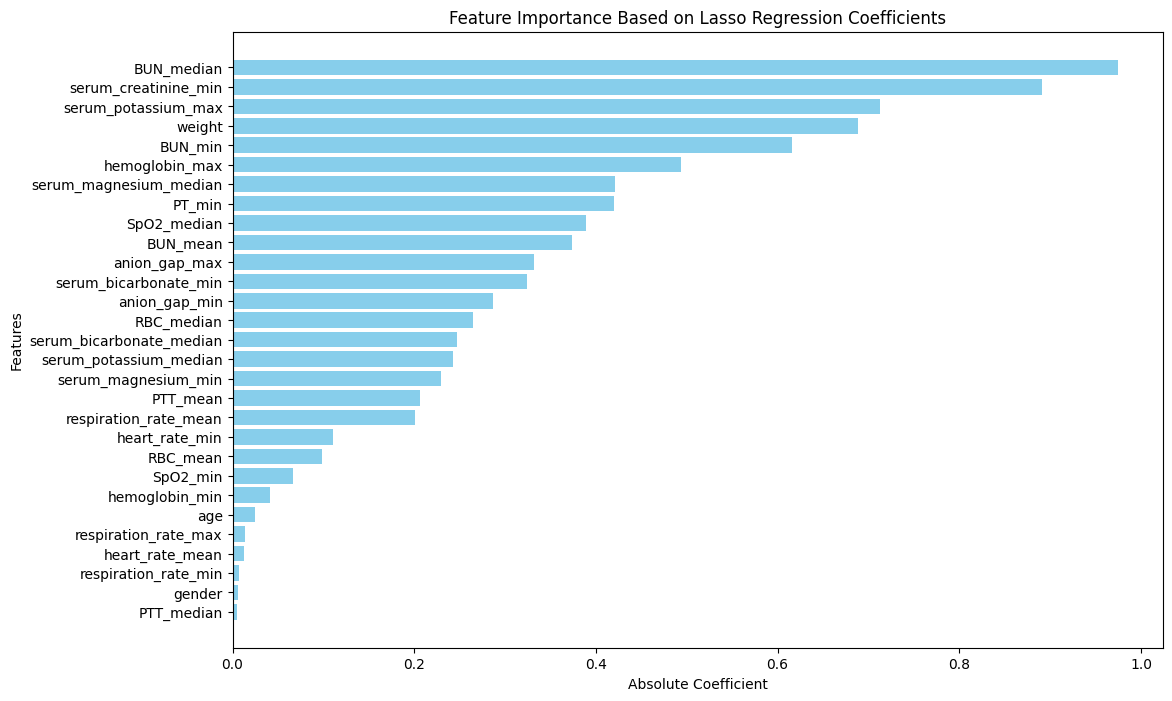

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Step 1: Create a DataFrame for features and their corresponding coefficients
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lasso_cv.coef_
})

# Step 2: Filter out features with zero coefficients (those not selected by Lasso)
feature_importance = feature_importance[feature_importance['Coefficient'] != 0]

# Step 3: Sort features by the absolute value of their coefficients
feature_importance = feature_importance.assign(Abs_Coefficient=feature_importance['Coefficient'].abs())
feature_importance = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)

# Step 4: Plot only selected features
plt.figure(figsize=(12, 8))
plt.barh(feature_importance['Feature'], feature_importance['Abs_Coefficient'], color='skyblue')
plt.xlabel('Absolute Coefficient')
plt.ylabel('Features')
plt.title('Feature Importance Based on Lasso Regression Coefficients')
plt.gca().invert_yaxis()  # Invert y-axis to show highest importance at the top
plt.show()



In [29]:
import pandas as pd
import numpy as np

# 假设 'lasso_cv.coef_' 已经从 Lasso 回归中得到
# 创建包含特征名称和对应系数的 DataFrame
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lasso_cv.coef_
})

# 计算系数的绝对值，并将其添加为一个新列
feature_importance['Abs_Coefficient'] = feature_importance['Coefficient'].abs()

# 过滤掉系数为0的特征
feature_importance = feature_importance[feature_importance['Coefficient'] != 0]

# 提取特征的前缀（去掉后缀，例如 "_min", "_max", "_mean", "_median"）
feature_importance['Prefix'] = feature_importance['Feature'].str.extract(r'(.+?)_(min|max|mean|median)$')[0]

# 对具有相同前缀的特征分组，选择绝对值系数最大的特征
selected_features = feature_importance.loc[feature_importance.groupby('Prefix')['Abs_Coefficient'].idxmax()]

# 查看最终选择的特征
final_selected_features = selected_features['Feature'].tolist()

#features with no underline“_":
features_wo_underline = list(set(['gender', 'age', 'height', 'weight', 'BMI', 'CHF', 'hypertension', 'CPD', 'diabetes', 'MI', 'CD', 'CDK', 'cancer']) - set(['cancer', 'CDK', 'hypertension', 'height', 'BMI', 'CHF', 'CD', 'CPD', 'MI', 'diabetes']))

# 合并这两个列表并去除重复项
final_selected_features_combined = list(set(final_selected_features + features_wo_underline))

# 查看最终选择的特征
print("Final combined selected features:", final_selected_features_combined)



Final combined selected features: ['serum_creatinine_min', 'respiration_rate_mean', 'RBC_median', 'PTT_mean', 'BUN_median', 'PT_min', 'anion_gap_max', 'serum_bicarbonate_min', 'age', 'weight', 'SpO2_median', 'serum_potassium_max', 'hemoglobin_max', 'gender', 'heart_rate_min', 'serum_magnesium_median']


In [30]:


# 假设 `final_selected_features` 和 `features_wo_underline` 已定义
# 合并两个列表并去除重复项
final_selected_features_combined = list(set(final_selected_features + features_wo_underline))

# 从 `feature_importance` DataFrame 中筛选出最终选择的特征
final_selected_features_df = feature_importance[feature_importance['Feature'].isin(final_selected_features_combined)]

# 按绝对系数从高到低排序
final_selected_features_df_sorted = final_selected_features_df.sort_values(by='Abs_Coefficient', ascending=False)

# 输出包含最终特征和 Lasso 系数的 DataFrame
print("Number of final selected features:", len(final_selected_features_df_sorted))
print("Final selected features with coefficients sorted by absolute coefficient:")
print(final_selected_features_df_sorted[['Feature', 'Coefficient', 'Abs_Coefficient']])



Number of final selected features: 16
Final selected features with coefficients sorted by absolute coefficient:
                   Feature  Coefficient  Abs_Coefficient
34              BUN_median     0.974961         0.974961
36    serum_creatinine_min    -0.890688         0.890688
16     serum_potassium_max     0.712773         0.712773
0                   weight     0.688527         0.688527
39          hemoglobin_max    -0.493923         0.493923
22  serum_magnesium_median     0.421437         0.421437
28                  PT_min     0.419556         0.419556
7              SpO2_median    -0.389608         0.389608
12           anion_gap_max     0.332261         0.332261
48   serum_bicarbonate_min    -0.324391         0.324391
46              RBC_median     0.264779         0.264779
25                PTT_mean     0.205852         0.205852
10   respiration_rate_mean     0.201225         0.201225
1           heart_rate_min     0.110142         0.110142
52                     age     0.

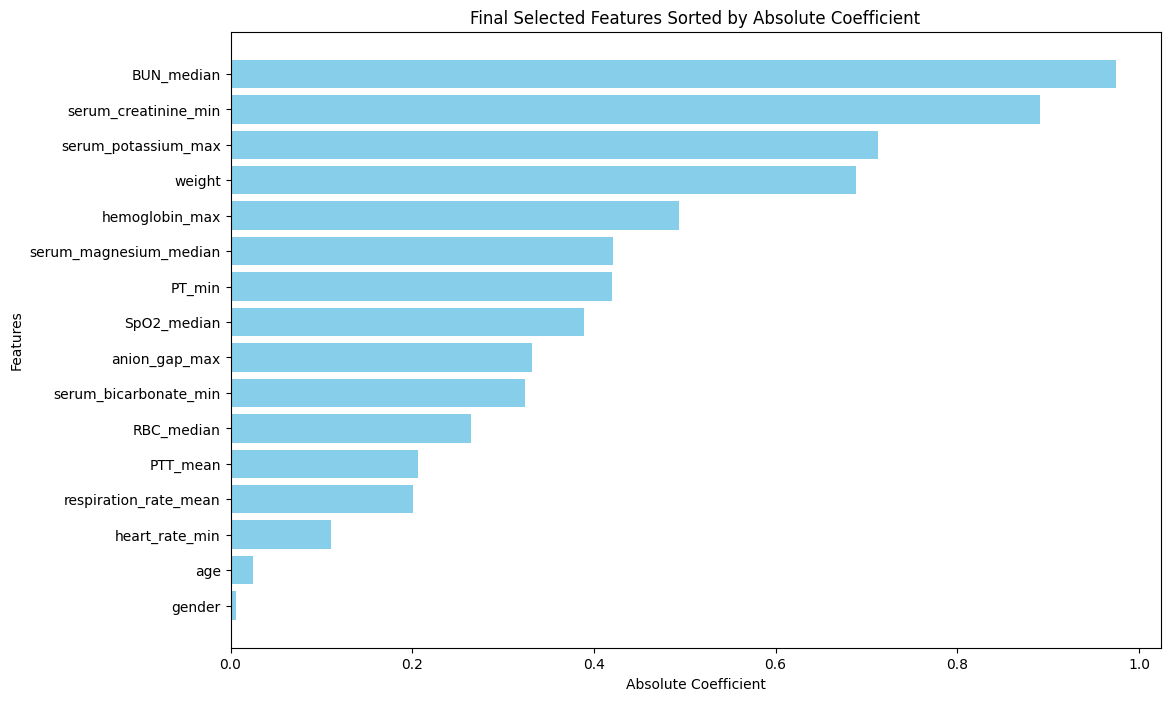

In [31]:


# 绘制图表
plt.figure(figsize=(12, 8))
plt.barh(final_selected_features_df_sorted['Feature'], final_selected_features_df_sorted['Abs_Coefficient'], color='skyblue')
plt.xlabel('Absolute Coefficient')
plt.ylabel('Features')
plt.title('Final Selected Features Sorted by Absolute Coefficient')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest values at the top
plt.show()


In [32]:
# 去除后缀
cleaned_features = [feature.rsplit('_', 1)[0] for feature in final_selected_features]
cleaned_features

['BUN',
 'PT',
 'PTT',
 'RBC',
 'SpO2',
 'anion_gap',
 'heart_rate',
 'hemoglobin',
 'respiration_rate',
 'serum_bicarbonate',
 'serum_creatinine',
 'serum_magnesium',
 'serum_potassium']

In [33]:
import pandas as pd

# 假设 `final_selected_features_combined` 列表和原始 DataFrame `df` 已定义
# 将最终选择的特征列和 `if_aki` 列保留，并删除特征列的后缀

# Step 1: 将 `if_aki` 列加入到选择的特征列表中
selected_columns = final_selected_features_combined + ['if_aki']

# Step 2: 从原始 DataFrame 中筛选这些列
df_filtered = df_min_max_patients[selected_columns]

# Step 3: 去除特征列名中的后缀，保留 `if_aki` 不变
df_filtered.columns = [col.rsplit('_', 1)[0] if col != 'if_aki' else col for col in df_filtered.columns]

# Step 4: 将结果保存为新的 CSV 文件
output_path = 'C:/Users/Rui/Desktop/Data/final_selected_features_with_y_label.csv'
df_filtered.to_csv(output_path, index=False)

print("Final CSV with 'if_aki' saved to:", output_path)


Final CSV with 'if_aki' saved to: C:/Users/Rui/Desktop/Data/final_selected_features_with_y_label.csv
